In [167]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
# 定义目标函数
def target_function(x):
    return x * x * x + x * x

x = np.linspace(0, 1, 1000) # 生成从0到1的等间距1000个样本点
y = target_function(x) # 计算目标函数的值

# 将数据集划分为训练集和测试集，测试集占80%
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=1)
# 将训练集进一步划分为训练集和验证集，验证集占训练集的12.5%
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=1)

In [ ]:
input_dim = 1
hidden_dim = 128 # 隐藏层维度为128
output_dim = 1

# 初始化权重和偏置，使用He初始化方法
W1 = np.random.randn(hidden_dim, input_dim) * np.sqrt(1 / input_dim)
W2 = np.random.randn(output_dim, hidden_dim) * np.sqrt(1 / hidden_dim)
# 初始化隐藏层偏置为零
b1 = np.zeros((hidden_dim, 1))
b2 = np.zeros((output_dim, 1))

cache = {}

 # 线性变换函数
def linear(W, X, b):
    return np.matmul(W, X) + b

# ReLU激活函数
def relu(X):
    return np.where(X > 0, X, 0)

# 前向传播函数
def forward(x):
    x = x.reshape(1, -1) # 将输入x转换为列向量
    cache['out0'] = x # 存储输入x到缓存
    x = linear(W1, x, b1) # 第一层线性变换
    cache['out1'] = x # 存储第一层输出到缓存
    x = relu(x) # 第一层ReLU激活
    cache['out2'] = x # 存储ReLU输出到缓存
    output = linear(W2, x, b2) # 第二层线性变换
    cache['out3'] = output # 存储第二层输出到缓存
    return output # 返回最终输出

# 损失函数，计算均方误差
def loss_fn(y_pred, target):
    loss = np.sum((y_pred - target) ** 2, axis=1, keepdims=True) / len(y_pred)
    cache['loss'] = (y_pred - target) / len(y_pred) # 存储损失的梯度到缓存
    return loss

# 反向传播函数
def backward(lr, batch_size):
    global W1, W2, b1, b2
    
    delta2 = cache['loss'] / batch_size # 计算第二层损失的梯度
    dW2 = np.matmul(delta2, cache['out2'].T) / batch_size # 计算W2的梯度
    db2 = np.sum(delta2, axis=1, keepdims=True) / batch_size # 计算b2的梯度
    
    delta1 = np.matmul(W2.T, delta2) * (cache['out1'] > 0) # 计算第一层损失的梯度
    dW1 = np.matmul(delta1, cache['out0'].T) / batch_size # 计算W1的梯度
    db1 = np.sum(delta1, axis=1, keepdims=True) / batch_size # 计算b1的梯度
    
    # 更新权重和偏置
    W1 -= lr * dW1
    W2 -= lr * dW2
    b1 -= lr * db1
    b2 -= lr * db2


In [ ]:
# 训练模型
def train(X, y, epochs=100000, batch_size=32, lr=0.01, verbose_ep=10000):
    for epoch in range(epochs):
        rec_loss = 0
        for batch_idx in range(len(X) // batch_size): # 按批次处理数据
            # 获取当前批次的输入数据和标签数据
            X_batched = np.array([X[batch_idx * batch_size: min((batch_idx + 1) * batch_size, len(X))]])
            y_batched = np.array([y[batch_idx * batch_size: min((batch_idx + 1) * batch_size, len(y))]])
            y_pred = forward(X_batched) # 前向传播，得到预测值
            # 计算损失
            loss = np.sum(loss_fn(y_pred, y_batched)) / len(y_pred)
            rec_loss += loss # 累加损失
            backward(lr, batch_size) # 反向传播，更新参数
        if epoch % verbose_ep == 0: # 打印epoch和平均损失
            print(f"Epoch:{epoch}, Loss:{rec_loss / (len(X) // batch_size)}")

# 可视化结果函数
def visualize_results():
    x_plot = np.linspace(0, 1, 100).reshape(1, -1) # 生成从0到1的等间距100个样本点
    y_pred = forward(x_plot) # 使用模型进行预测
    
    plt.scatter(X_test, y_test, label='True Function', color='black', linestyle='dashed') # 绘制真实函数的散点图
    plt.plot(x_plot.flatten(), y_pred.flatten(), label='NumPy Fit', color='red', linestyle='dashed') # 绘制模型拟合的曲线
    plt.legend() # 显示图例
    plt.show() # 显示图形

Epoch:0, Loss:26.28750028041646
Epoch:10000, Loss:0.8754688001672424
Epoch:20000, Loss:0.7745636927580909
Epoch:30000, Loss:0.6267415891719755
Epoch:40000, Loss:0.439206611642898
Epoch:50000, Loss:0.27369530115092006
Epoch:60000, Loss:0.1636464577342333
Epoch:70000, Loss:0.10113773025075416
Epoch:80000, Loss:0.0666069579631225
Epoch:90000, Loss:0.04638553741854311


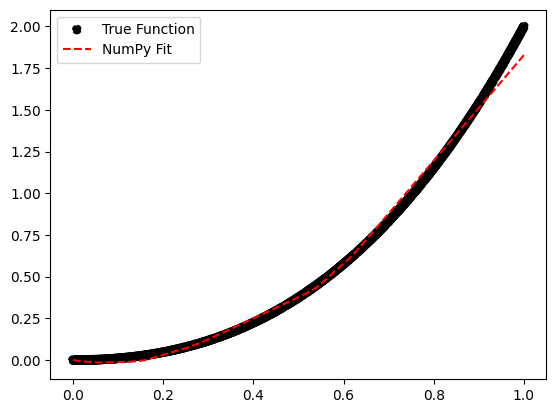

In [ ]:
train(X_train, y_train)  # 训练模型
visualize_results() # 可视化拟合结果